# <center>BEST STATE FOR RENTAL INVESTORS IN THE US</center>

Question: What is the best state for a home real estate investor to invest in?
    
One possible way to answer the question:
1. Create a list of factors that affect the investor's returns and costs
2. Gather and clean data around the factors
3. Create visualizations to map where each state stands
4. Combine all of the factors and rank each state on the combined ranking

Step 1: Factors

Some factors that can impact the returns and costs are 
1. Population Growth
2. Economic Growth
3. Average Home Price
4. Average Rental Price
5. Crime Rate
6. Cost of Living
7. Rental vacancy Rate
8. Annual Landlord Insurance
9. Annual Property Taxes

    Some of these factors directly impact the real estate investor. For example, average home price will determine the initial investment while the average rental price will impact their returns. Annual landlord insurance and property taxes are some of the other costs that the investor must take upon him. Additionally, a lower vacancy rate implies that there is currently low supply of rental units hence greater returns from rental income.
    
    Other factors directly impact the tenant. We must take these factors into consideration because it can either increase or decrease the demand for rental units in a state. A higher population growth and a stronger economic growth in a state implies that more people are moving to that state in search for greater economic opportunities, creating higher demand. A high crime rate and a higher cost of living, on the other hand, can discourage demand for rental units.
    

Step 2 and 3: We will now gather data and create visualizations to rank the states. 

The sources will be cited later. Most of the sources are either from the United States Census Bureau or third party platforms that took data from the United States Census Bureau.


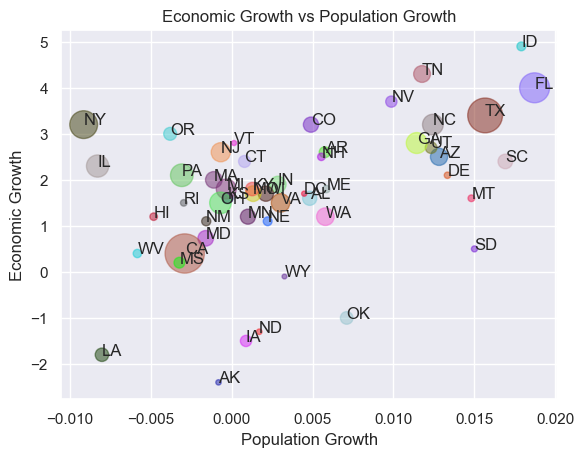

1              Idaho
10         Tennessee
0            Florida
12            Nevada
3              Texas
8     North Carolina
18          Colorado
50          New York
45            Oregon
11           Georgia
Name: State, dtype: object


<Figure size 640x480 with 0 Axes>

In [42]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import data
df1 = pd.read_csv('Population_growth.csv')
df2 = pd.read_csv('Economic_Growth.csv')
df3 = pd.read_csv('abbreviations.csv')

data = pd.merge(df1, df2, on = 'state', how = 'left')



#Drop unnecessary columns and rename columns to better understand the data
data.drop(columns = ['growthSince2010', 'gDPGrowth2020To21', 'gDPGrowth2019To20', 'gDPGrowth2018To19'], inplace = True)

new_columns = {
    'state' : 'State',
    'growthRate' : 'Pop_Growth',
    'pop2023' : 'Population',
    'gDPGrowth2021To22' : 'GDP_Growth'
}

data.rename(columns = new_columns, inplace = True)

#The following data were missing from the data. They were manually inserted from the United States Census Bureau.
data.at[40,'GDP_Growth'] = 0.73
data.at[17, 'GDP_Growth'] = 2.5
data.at[20, 'GDP_Growth'] = 1.7
data = pd.merge(data, df3, on = 'State', how = 'left' )
data['abbreviation'] = data['abbreviation'].astype('str')


#Making a plot of Population Growth vs Economic Growth
max_population = max(data.Population)
bubble_sizes = [pop / max_population * 800 for pop in data.Population]
colors = np.random.rand(len(data), 3)
plt.scatter(x = data.Pop_Growth, y = data.GDP_Growth, s = bubble_sizes, alpha = 0.5, c = colors)
plt.title('Economic Growth vs Population Growth')
plt.xlabel('Population Growth')
plt.ylabel('Economic Growth')

x,y = data['Pop_Growth'], data['GDP_Growth']
for i, txt in enumerate(data['abbreviation']):
    plt.annotate(txt, (x[i], y[i]))

plt.show()
plt.clf()

#Manipulate data to create a ranking of states with factors GDP Growth and Population growth in mind.
data['Econ&Pop'] = data['GDP_Growth'] + data['Pop_Growth']
print(data.nlargest(10, 'Econ&Pop').State)


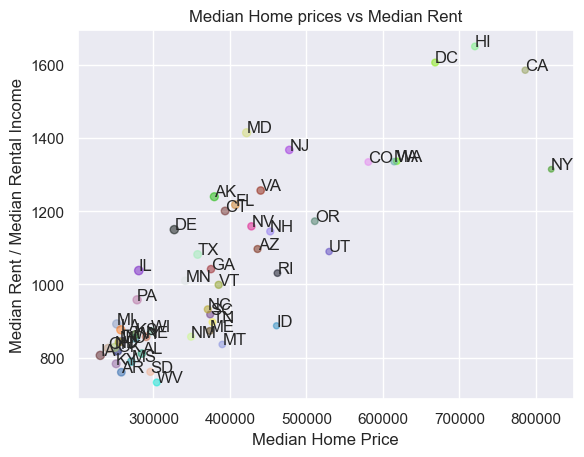

49        Illinois
34        Michigan
6         Delaware
30            Iowa
43    Pennsylvania
36            Ohio
48       Louisiana
40        Maryland
26    North Dakota
27        Missouri
23         Indiana
37          Alaska
13        Oklahoma
33          Kansas
28        Kentucky
Name: State, dtype: object


<Figure size 640x480 with 0 Axes>

In [43]:
df4 = pd.read_csv('Res_Price.csv')
df5 = pd.read_csv('Rent_Income.csv')

df4 = df4.drop(columns = ['medianHomePriceYearOnYearGrowth', 'dataUpdated'])
df5 = df5.drop(columns = ['averageRentZillow'])

data = pd.merge(data, df4, on = 'State', how = 'left' )
data = pd.merge(data, df5, on = 'State', how = 'left' )

#Filling in missing data from the United States Census Bureau
data.at[4,'MedianHomePrice'] = 296096
data.at[5, 'MedianHomePrice'] = 390000
data.at[26, 'MedianHomePrice'] = 249529
null_values = data.isna()

#This manipulation will be used to rank the states based on these two factor alone.
#The 1% Rule states that an investor should look for homes whose expected rent is at least 1% of the purchase price
#A higher ratio of rent/home price indicates higher return for the investor.
data['1% Rule'] = data['MedianRent'] / data['MedianHomePrice']

data.to_csv('data.csv', index = False)
#The bubble size is based on the 1% Rule
colors = np.random.rand(len(data),3)
plt.scatter(x = data.MedianHomePrice, y = data.MedianRent, s = data['1% Rule'] * 10000, alpha = 0.5, c = colors)
plt.title('Median Home prices vs Median Rent')
plt.xlabel('Median Home Price')
plt.ylabel('Median Rent / Median Rental Income')
x,y = data['MedianHomePrice'], data['MedianRent']
for i, txt in enumerate(data['abbreviation']):
    plt.annotate(txt, (x[i], y[i]))

plt.show()
plt.clf()

#Rank the state based on these two factors
print((data.nlargest(15, '1% Rule')).State)


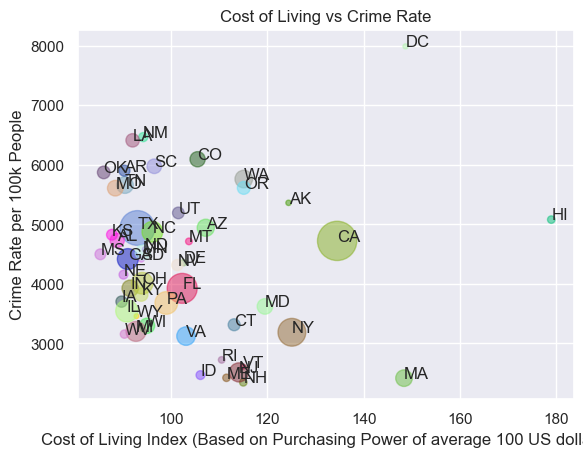

17    New Hampshire
14            Maine
38    Massachusetts
1             Idaho
35       New Jersey
32          Vermont
42     Rhode Island
22         Virginia
47    West Virginia
34         Michigan
50         New York
25        Wisconsin
31      Connecticut
21          Wyoming
49         Illinois
Name: State, dtype: object


<Figure size 640x480 with 0 Axes>

In [44]:
# Plot of Crime Rate vs Cost of Living - Livable factor
df6 = pd.read_csv('Crime_Rate.csv')
df7 = pd.read_csv('COL.csv')

#Cleaning Data
df6 = df6.drop(columns = ['pop2020', 'reported', 'violent', 'nonViolent', 'violentRate', 'nonViolentRate'])
df7 = df7.drop(columns  = ['GroceryCostsIndex', 'HealthCostsIndex', 'HousingCostsIndex','MiscCostsIndex' , 'TransportationCostsIndex', 'UtilityCostsIndex'])

data = pd.merge(data, df6, on = 'State', how = 'left')
data = pd.merge(data, df7, on = 'State', how = 'left')
data = data.rename(columns = {'2023' : 'COL', 'rate' : 'CrimeRate_100k'})

#Saving data
data.to_csv('data.csv', index = False)


colors = np.random.rand(len(data),3)
plt.scatter(x = data.COL, y = data.CrimeRate_100k, s = bubble_sizes, alpha = 0.5, c = colors)
plt.title('Cost of Living vs Crime Rate')
plt.xlabel('Cost of Living (Based on Purchasing Power of average 100 US dollars)')
plt.ylabel('Crime Rate per 100k People')
x,y = data['COL'], data['CrimeRate_100k']
for i, txt in enumerate(data['abbreviation']):
    plt.annotate(txt, (x[i], y[i]))
plt.show()
plt.clf()

# Finalizing the top 10 in this category

data['COL&Crime'] = data['COL'] + data['CrimeRate_100k']

print((data.nsmallest(15, 'COL&Crime')).State)

/var/folders/xc/pb6dtzdn48zgpc89q2t5g14h0000gn/T/ipykernel_3493/3160014010.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df8['State'] = df8['State'].str.replace('.','')


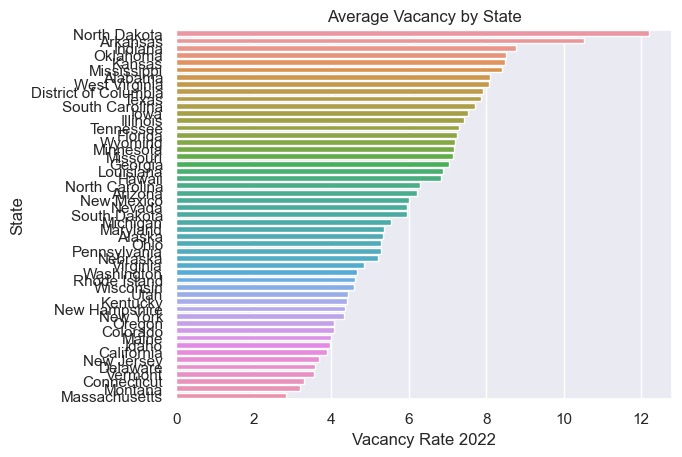

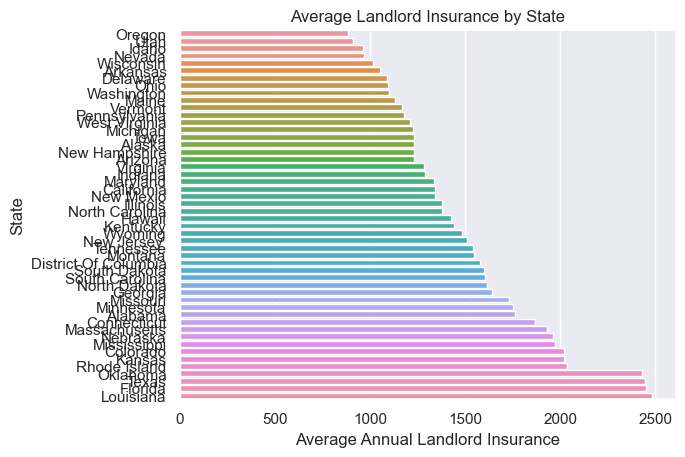

Index(['State', 'Pop_Growth', 'Population', 'GDP_Growth', 'abbreviation',
       'Econ&Pop', 'MedianHomePrice', 'MedianRent', '1% Rule',
       'CrimeRate_100k', 'COL', 'COL&Crime', 'propertyTaxRate'],
      dtype='object')


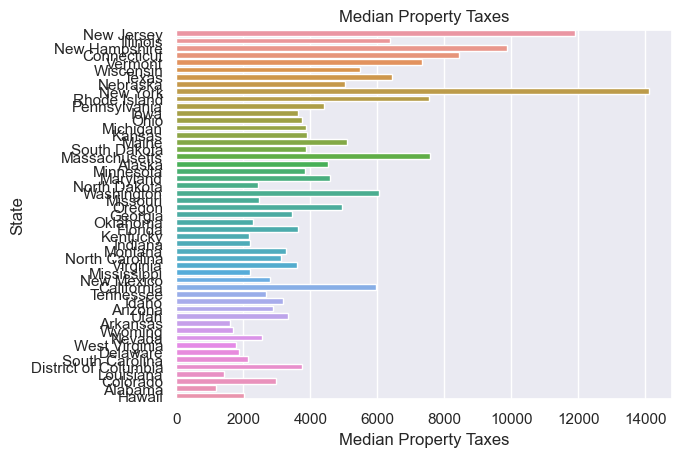

<Figure size 640x480 with 0 Axes>

In [45]:
# Vacancy Rate 
df8 = pd.read_csv('Rent_Vacancy.csv')

#Clean Data
df8['State'] = df8['State'].str.replace('.','')

df8 = df8.drop(columns = [ 'Margin of Error1', 'Margin of Error1.1', 'Margin of Error1.2', 'Margin of Error1.3'])
df8['Average_Vacancy'] = df8[['First         Quarter       2022', 'Second         Quarter       2022', 'Third         Quarter       2022', 'Fourth         Quarter       2022']].mean(axis = 1)
df8 = df8.sort_values(by='Average_Vacancy', ascending=False)

#Plotting data
sns.barplot(x = 'Average_Vacancy', y = 'State', data = df8)
plt.xlabel('Vacancy Rate 2022')
plt.ylabel('State')
plt.title('Average Vacancy by State')
plt.show()
plt.clf()


#Annual Landlord Insurance - in order to account for natural disasters 
df9 = pd.read_csv('Landlord_Insurance_Annual.csv')
df9 = df9.sort_values(by = 'Landlord_Insurance')


#Plotting data
sns.barplot(x = 'Landlord_Insurance', y = 'State', data = df9)
plt.xlabel('Average Annual Landlord Insurance')
plt.ylabel('State')
plt.title('Average Landlord Insurance by State')
plt.show()
plt.clf()

#Annual Property Taxes 
df10 = pd.read_csv('Property Tax Rate.csv')
data = pd.merge(data, df10, on = 'State', how = 'right' )


#Manipulating data from tax rate to property taxes
data['Median Property Taxes'] = data.apply(lambda row: row['MedianHomePrice'] * row['propertyTaxRate'], axis =1 )




#Plotting Data
sns.barplot(x = 'Median Property Taxes', y = 'State', data = data)
plt.xlabel('Median Property Taxes')
plt.ylabel('State')
plt.title('Median Property Taxes')
plt.show()
plt.clf()


In [46]:
#Finding out the Best State considering all of the factors - Last Step
data = pd.merge(data, df8, on = 'State', how = 'left' )
data = pd.merge(data, df9, on = 'State', how = 'left' )


Ranking = pd.DataFrame()
Ranking['State'] = data.State
Ranking['PropertyTaxes_Rank'] = data['Median Property Taxes'].rank(ascending=True)
Ranking['Landlord_Insurance_Rank'] = data['Landlord_Insurance'].rank(ascending=True)
Ranking['Average_Vacancy_Rank'] = data['Average_Vacancy'].rank(ascending=True)
Ranking['COL&Crime_Rank'] = data['COL&Crime'].rank(ascending=True)
Ranking['1% Rule_Rank'] = data['1% Rule'].rank(ascending=False) 
Ranking['GDP+Pop_Growth_Rank'] = data['Econ&Pop'].rank(ascending=False)  

Ranking['Final Rank'] = Ranking['PropertyTaxes_Rank'] + Ranking['Landlord_Insurance_Rank'] + Ranking['Average_Vacancy_Rank'] + Ranking['COL&Crime_Rank'] + Ranking['1% Rule_Rank'] + Ranking['GDP+Pop_Growth_Rank']
Ranking = Ranking.sort_values(by='Final Rank')


Ranking.to_csv('Ranking.csv', index = False)

print(Ranking.State)

44                Delaware
37                   Idaho
42                  Nevada
4                  Vermont
28                Kentucky
13                Michigan
10            Pennsylvania
12                    Ohio
5                Wisconsin
15                   Maine
2            New Hampshire
32                Virginia
29                 Indiana
3              Connecticut
39                    Utah
40                Arkansas
1                 Illinois
24                  Oregon
41                 Wyoming
20                Maryland
38                 Arizona
31          North Carolina
43           West Virginia
27                 Florida
11                    Iowa
25                 Georgia
17           Massachusetts
30                 Montana
23                Missouri
36               Tennessee
48                Colorado
49                 Alabama
18                  Alaska
7                 Nebraska
45          South Carolina
50                  Hawaii
21            North Dakota
1

The best state to invest in as a home real estate investor is Delaware!

Additional Remarks:
Obviously, the factors that I chose were based on my research and what I found to be the most impactful. However, there may be other factors that other real estate investors would consider important.

Soures:
1. https://worldpopulationreview.com/state-rankings/fastest-growing-states
2. https://worldpopulationreview.com/state-rankings/gdp-growth-by-state
3. https://www.census.gov/housing/hvs/data/rates.html
4. https://www.simplyinsurance.com/landlord-insurance-rates-by-state/
5. https://worldpopulationreview.com/state-rankings/property-taxes-by-state
6. https://worldpopulationreview.com/state-rankings/crime-rate-by-state
7. https://worldpopulationreview.com/state-rankings/cost-of-living-index-by-state
8. https://worldpopulationreview.com/state-rankings/median-home-price-by-state
9. https://worldpopulationreview.com/state-rankings/average-rent-by-state